In [1]:
#Technologies: solar and battery

import pypsa
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

n=pypsa.Network()

#Snapshots
n.set_snapshots(value=pd.date_range(freq="h", start="2013-01-01", end="2014-01-01", inclusive='left'))
n.snapshot_weightings[:] *= 8760.0 / n.snapshot_weightings.sum()

print(n)


c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages

Empty PyPSA Network
Components: none
Snapshots: 8760


In [2]:
#I create the bus 

n.madd("Bus", ["onebus"], x=0.1, y=0.2)

#To see the bus: n.buses

Index(['onebus'], dtype='object')

In [3]:
n.generators.p_set

Series([], Name: p_set, dtype: float64)

In [4]:
n.buses

,x,y,v_nom,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
onebus,0.1,0.2,1.0,,AC,None,1.0,0.0,inf,PQ,


In [5]:

# #I import a time series for generation 

with xr.open_dataset(r'C:\Users\denis\OneDrive\Desktop\Mini grids\pypsa-distribution\time_series\Generation_timeseries\profile_solar.nc') as ds:


    solar=ds["profile"].transpose("time", "bus").to_pandas()

#I take just the first column(one bus)

solar=solar.iloc[:, 0]

solar=pd.DataFrame(solar,
                  index=n.snapshots)

#I create a numpy array 
#import numpy as np
# solar=np.array(solar)


In [6]:
#I connect a generator to the bus "onebus"

#n.madd("Generator", ["solargenerator"], bus = "onebus", capital_cost=400, marginal_cost=0.3, p_max_pu=solar)
n.madd("Generator", ["solargenerator"], bus = "onebus", p_nom=60, p_nom_extendable=True, p_nom_min=50, 
       p_nom_max=60, p_max_pu=solar, p_set=solar, q_set=50, carrier="solar", capital_cost=400, efficiency=1, marginal_cost=0.3)

#Not to have the warning: p_max_pu=solar_df, solar_df=solar["0"]


Index(['solargenerator'], dtype='object')

In [7]:
n.generators

,bus,p_nom,p_nom_extendable,p_nom_min,p_nom_max,q_set,carrier,capital_cost,efficiency,marginal_cost,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
solargenerator,onebus,60.0,True,50.0,60.0,50.0,solar,400.0,1.0,0.3,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [8]:
#I import a time series for load as pandas dataframe
import pandas as pd

load=pd.read_csv(r'C:\Users\denis\OneDrive\Desktop\Mini grids\pypsa-distribution\time_series\Load_timeseries\sample_profile.csv', parse_dates=True)

#Used at first, now changed to make it look similar to solar data
# date_index=pd.date_range('01/01/2013', periods=8760, freq='h')
# date_index = pd.DataFrame(date_index, columns=['time'])
# date_index['bus 0']=load_df['bus 0']
# load=date_index

load=load["bus 0"]
load=pd.DataFrame(load)
load = load.set_index([n.snapshots])


load_df=load["bus 0"]

print(load)
#p_set=load_df

#I create a numpy array 
#load=np.array(load)



                         bus 0
snapshot                      
2013-01-01 00:00:00  18.559885
2013-01-01 01:00:00  20.595279
2013-01-01 02:00:00  14.449810
2013-01-01 03:00:00  16.499849
2013-01-01 04:00:00  13.390089
...                        ...
2013-12-31 19:00:00  57.438227
2013-12-31 20:00:00  35.517246
2013-12-31 21:00:00  33.213649
2013-12-31 22:00:00  30.535195
2013-12-31 23:00:00  25.422619

[8760 rows x 1 columns]


In [9]:

#I connect the load to the bus "onebus"

n.madd("Load", ["MyLoad"], bus=["onebus"], carrier="AC", p_set = load)
 #p_set [MW]

#Not to have the warning: load_df=load["bus 0"] and p_set=load_df

# n.loads



Index(['MyLoad'], dtype='object')

In [10]:
n.loads

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
MyLoad,onebus,AC,,0.0,0.0,-1.0


In [11]:
#n.buses

In [12]:
#n.madd("StorageUnit", ["mySU"] , bus="onebus", p_nom=50, capital_cost=300)

In [13]:
n.madd("StorageUnit",["StorUni"], bus="onebus", marginal_cost=10, inflow=50, p_nom_extendable=True, capital_cost=10, p_nom=2000, 
       efficiency_dispatch=0.5, cyclic_state_of_charge=True, state_of_charge_initial=1000)

Index(['StorUni'], dtype='object')

In [14]:
#I want to see my whole network:

print(n)

PyPSA Network
Components:
 - Bus: 1
 - Generator: 1
 - Load: 1
 - StorageUnit: 1
Snapshots: 8760


<AxesSubplot: xlabel='snapshot'>

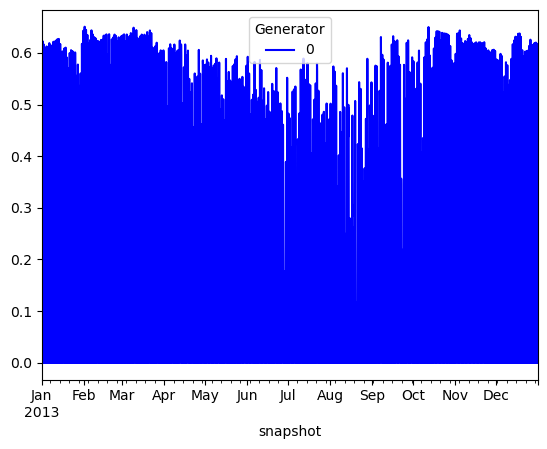

In [15]:
#Plotting the generation
n.generators_t.p_max_pu.plot(color='blue')


<AxesSubplot: xlabel='snapshot', ylabel='MW'>

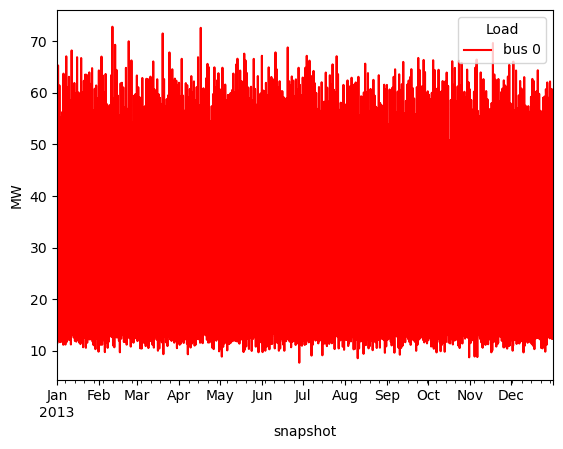

In [16]:
#Plotting the load
n.loads_t.p_set.plot(color='red', ylabel='MW')


In [17]:
#Optimization
from pypsa.linopf import ilopf

solver_name="gurobi"

n.lopf(n.snapshots, solver_name=solver_name, pyomo=False)


INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 1.14s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-07
Read LP format model from file C:\Users\denis\AppData\Local\Temp\pypsa-problem-2tp9f0bp.lp
Reading time = 0.23 seconds
obj: 87600 rows, 43803 columns, 175200 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 87600 rows, 43803 columns and 175200 nonzeros
Model fingerprint: 0x6f5d4f77
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [3e-01, 4e+02]
  Bounds range     [5e+01, 4e+04]
  RHS range        [5e+01, 5e+01]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 43800 rows and 8761 columns
Presolve time: 0.13s
Presolved: 43800 rows, 35042 columns, 122640 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.4000000e+04   0.000000e+00   0.000000e+00      0s

Use crossover to conver

INFO:pypsa.linopf:Optimization successful. Objective value: -2.40e+04


('ok', 'optimal')

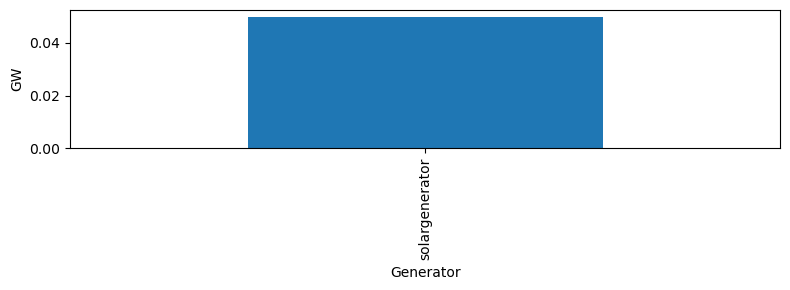

In [19]:
n.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()